# Лабораторная 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_circles

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score

## 1.1 Постановка задачи кластеризации

***Дано:***

$X$ - пространство объектов

$X^l$ - обучающая выборка

$\rho: X * X -> [0;\infty)$ - функция расстояния между объектами

***Найти:***

$Y$ - множество кластеров

$a : X -> Y$ - алгоритм кластеризации

При этом кластеры должны иметь следующии свойства:

* объекты ***одного*** кластера должны ***быть похожи***
* объекты ***разных*** кластеров должны ***отличаться***

Задача кластеризация — это задача ***обучения без учителя***. В данной задаче у нас нет обучающей выборки и нет ответов(классов). 
    

## 1.2 Проблема задачи кластеризации 

Рассмотрим простой пример. У нас есть выборка из 300 экземпляров. Сколько здесь кластеров? Мы легко можем увидеть, что здесь присутствует 4 кластера. 

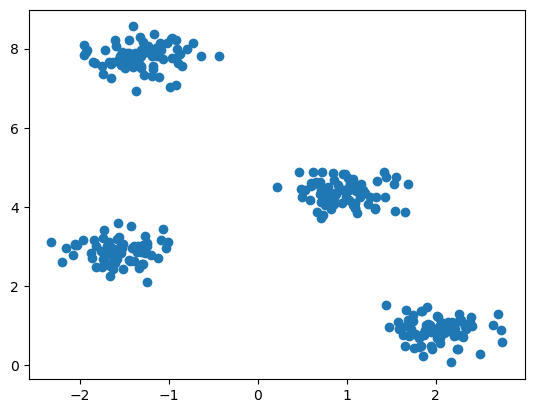

In [4]:
# Генерация случайных данных
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.30, random_state=0)

# Визуализация результатов
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Рассмотрим более сложный пример. Сколько здесь кластеров? Возможно здесь ***2, 3, 5 кластеров, а может быть ещё больше?***. 

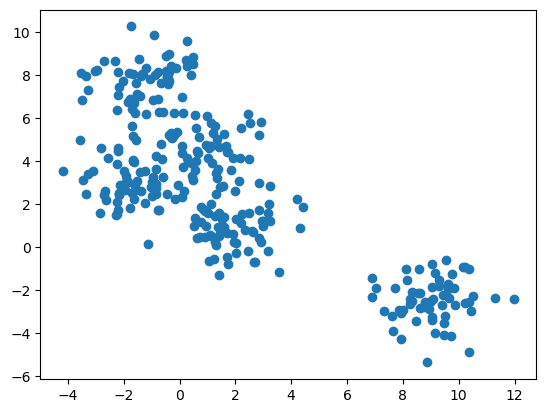

In [5]:
# Генерация случайных данных
X, _ = make_blobs(n_samples=300, centers=5, cluster_std=1.0, random_state=0)

# Визуализация результатов
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Рассмотрим ещё один пример. Сколько здесь кластеров? ***Здесь вообще есть кластеры?***

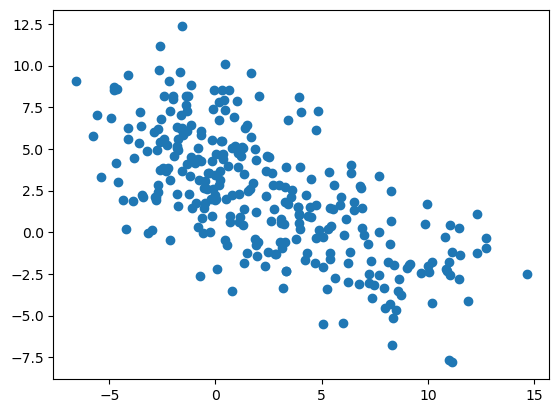

In [6]:
# Генерация случайных данных
X, _ = make_blobs(n_samples=300, centers=6, cluster_std=2, random_state=0)

# Визуализация результатов
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Данные примеры показывают одну из проблем задачи классификации - решение задачи кластеризации ***неоднозначно***. Это связано с рядом причин:

1. Количество кластеров ***неизвестно***. 
2. Результат кластеризации сильно зависит от ***выбранной метрики***. 
3. ***Нет единого критерия*** оценки качества кластеризации. 
4. Существует ***большое разнообразие методов кластеризации***, не все из которых имеют строгое теоретическое обоснование. 

## 1.3 Цели задачи кластеризации

1. **Упрощение данных:**  Кластеризация может помочь разбить данные на несколько кластеров, что позволит работать с каждым кластером по отдельности. 

2. **Анализ аномалий**: Кластеризация может помочь выявить аномальные или необычные объекты в данных путем выделения кластеров, содержащих малое количество объектов.

3. **Сжатие данных**: Кластеризация может использоваться для уменьшения размерности данных путем замены экземпляров кластеров на их центры. 

4. **Построение иерархии:** С помощью кластеризации можно построить иерархию данных. 

Существует несколько методов решения задачи кластеризации:
1. **K-средних (K-means)**: Этот метод разбивает данные на заранее заданное количество кластеров (K) и минимизирует среднее расстояние между объектами и их центрами в каждом кластере.
2. **Иерархическая кластеризация**: Этот метод строит иерархию кластеров, начиная с того, что каждый объект начинает как отдельный кластер, и затем объединяет их постепенно в более крупные кластеры.
3. **DBSCAN**: Этот метод основан на плотности данных и способен обнаруживать кластеры произвольной формы.

## 2.1 Метод K-средних

Процесс работы метода K-средних можно описать следующим образом:

1. **Инициализация центров**: Сначала выбираются K случайных объектов из набора данных в качестве центра каждого кластера. Это означает, что мы предполагаем наличие K кластеров. 

2. **Присвоение объектов к ближайшим центрам**: Каждый объект назначается к одному из K кластеров на основе ближайшего расстояния до центра кластера. 

3. **Пересчет центров**: Для каждого кластера вычисляется новый центр.

4. **Повторение шагов 2 и 3**: Шаги 2 и 3 повторяются до тех пор пока центры кластеров не перестанут изменяться или будут меняться незначительно. 

5. **Конец**: По завершении работы алгоритма каждый объект назначен к одному из K кластеров.

Рассмотрим пример работы данного алгоритма. 

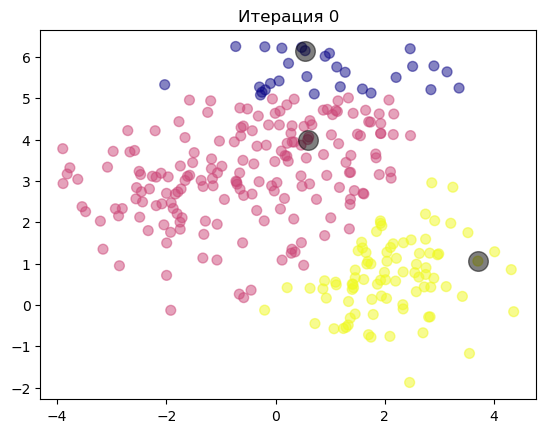

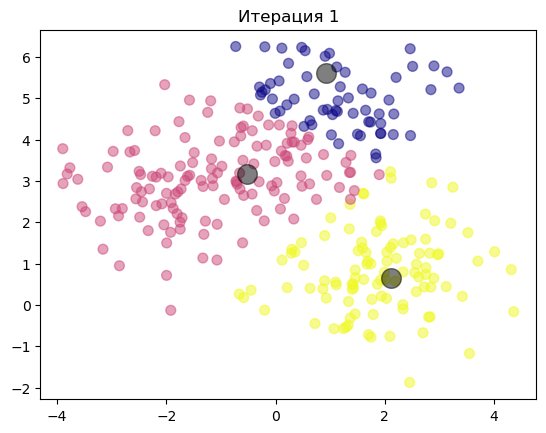

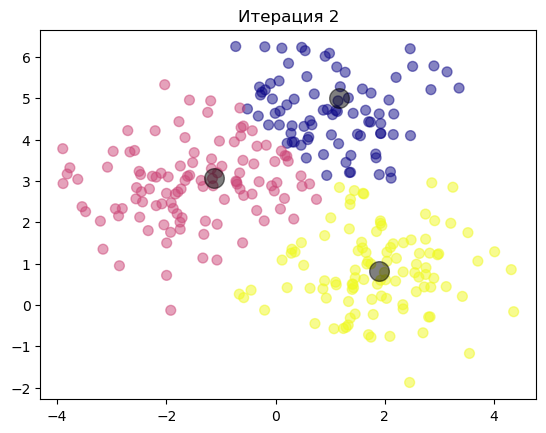

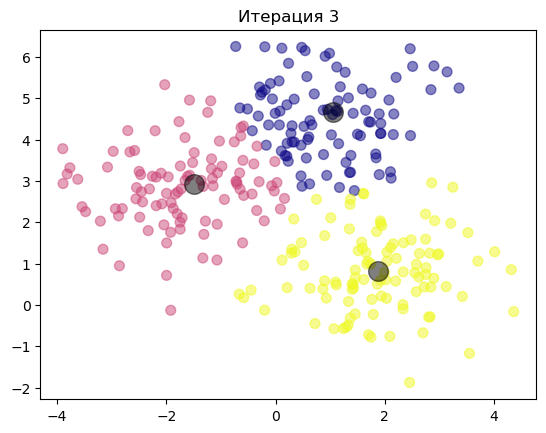

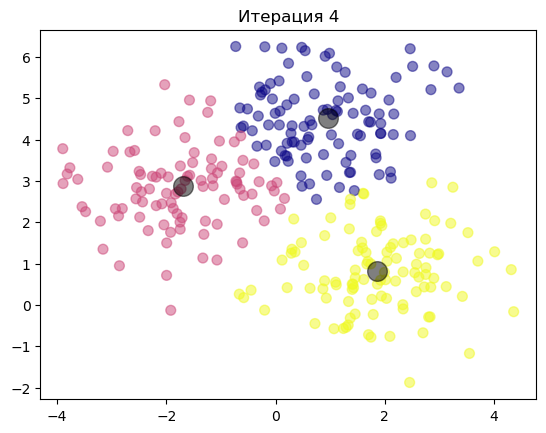

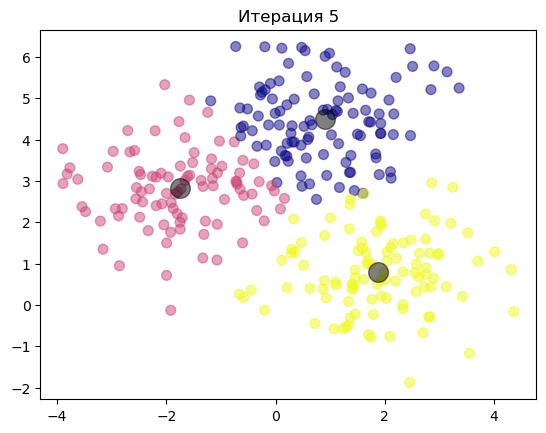

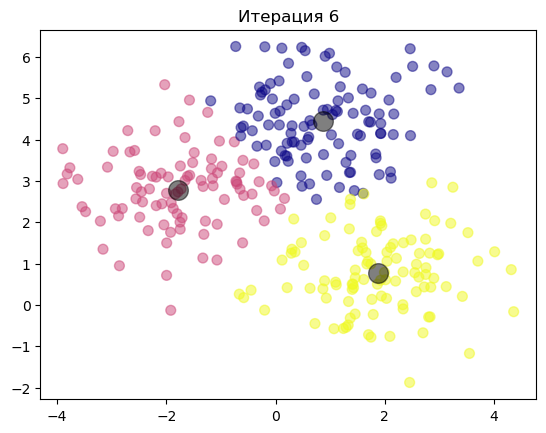

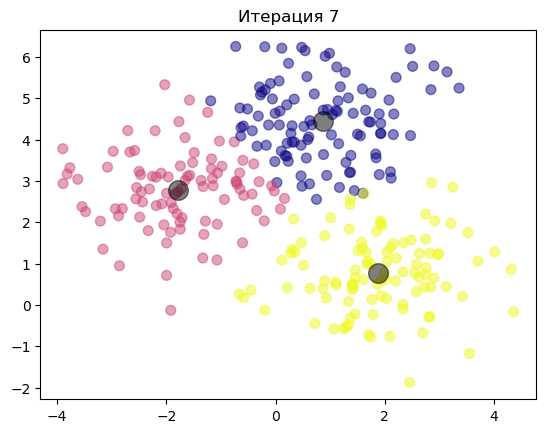

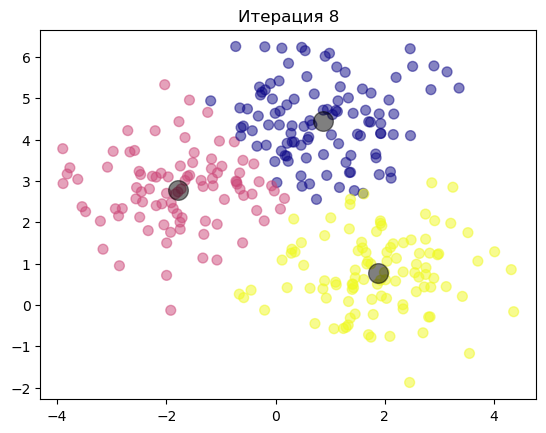

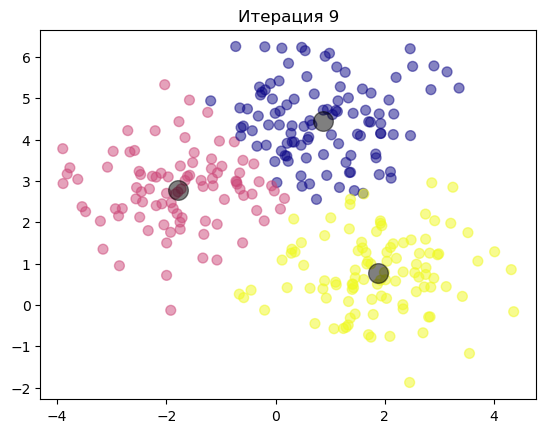

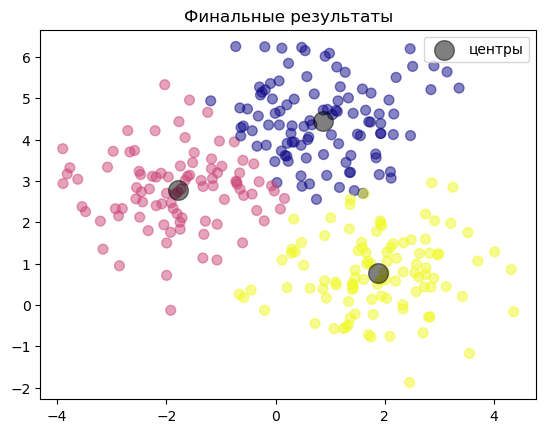

In [7]:
# Наши данные 
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=0)

# Инициализация центров случайным образом
k = 3
np.random.seed(0)
centroids = X[np.random.choice(X.shape[0], k, replace=False)]

# Алгоритм
max_iterations = 10
for _ in range(max_iterations):
    # Шаг 1: Присвоение объектов к ближайшим центроидам
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    labels = np.argmin(distances, axis=0)
    
    # Визуализация текущих кластеров
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma', s=50, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)
    plt.title('Итерация {}'.format(_))
    plt.show()
    
    # Шаг 3: Пересчет центров
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    centroids = new_centroids

# Шаг 5 
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma', s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5, label='центры')
plt.legend()
plt.title('Финальные результаты')
plt.show()

Мы можем наблюдать, что с каждой новой итерацией центры меняются всё меньше и меньше, и в какой - то момент ***перестают меняться***. В данный момент может возникнуть два вопроса:

1. ***Как выбрать начальные центры?***
2. ***Какую метрику использовать?***

***Ответы***:
1. Центры нужно выбирать случайным образом из объектов выборки, однако нужно стараться сделать так, чтобы расстояние между случайными объектами(начальными центрами) было большим. 
2. K-Means работает с Евклидовой метрикой. 

## 2.2 метод K-средних в scikit-learn

Конечно же данный метод реализован в scikit-learn. 

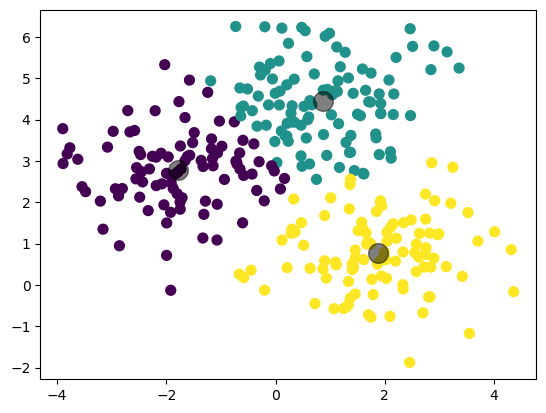

In [8]:
# Наши данные 
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=0)

# Применение метода K-средних
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Визуализация результатов
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

Некоторые из гиперпараметров:

1. ***n_clusters***: количество кластеров
2. ***init***: метод инициализации начальных центров кластеров (например, "k-means++" или "random").
3. ***n_init***: количество запусков алгоритма с разными начальными центрами (по умолчанию 10).
4. ***max_iter***: максимальное количество итераций алгоритма в одном запуске (по умолчанию 300).
5. ***tol***: критерий остановки - минимальное изменение суммы квадратов в выбранных центрах, при котором алгоритм продолжает итерации.

## 3.1 Иерархическая кластеризация

***Иерархическая кластеризация*** - это метод кластерного анализа, который строит иерархию кластеров. Есть два основных подхода к иерархической кластеризации: 

1. ***агломеративный*** (снизу вверх)

2. ***дивизивный*** (сверху вниз)

Иерархическая кластеризация работает следующим образом:

1. Создаём столько кластеров, сколько у нас объектов в выборке
2. Повторяем итеративно слияние двух ближайших кластеров, пока не выполнится критерий останова.

***Тут может возникнуть 2 вопроса***:
    
1. Как мы определяем расстояние между двумя кластерами?
2. Что является критерием останова?

***Ответы:***

1. Определяем как среднее расстояние между объектами кластеров, минимальное расстояние или максимальное.
2. Критерием останова может быть: число кластеров или более сложные эвристики. 

## 3.2 Иерархическая кластеризация в scikit-learn

Конечно же данный метод реализован в scikit-learn. 

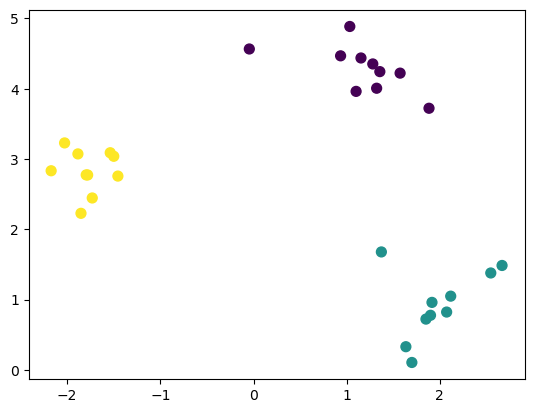

In [62]:
# Генерация синтетических данных
X, _ = make_blobs(n_samples=30, centers=3, cluster_std=0.4, random_state=0)

# Применение иерархической кластеризации
agg_clustering = AgglomerativeClustering(n_clusters=3)
assignment = agg_clustering.fit_predict(X)

# Визуализация результатов
plt.scatter(X[:, 0], X[:, 1], c=assignment, s=50, cmap='viridis')
plt.show()

Кроме того в контексте иерархической кластеризации у нас есть возможность построить ***Дендрограмму***. 

***Дендрограмма*** - это диаграмма в виде дерева, которая используется для визуализации иерархической кластеризации. Каждый узел в дендрограмме представляет собой кластер данных или объединение кластеров. Расстояние между точками данных или кластерами соответствует положению узлов на дендрограмме.

На дендрограмме ось Y представляет расстояние или схожесть между кластерами или кластеризуемыми точками данных, а ось X обозначает отдельные точки данных или кластеры.

Дендрограмма позволяет визуализировать процесс иерархической кластеризации и представить информацию об объединении кластеров на различных уровнях иерархии. Участки дендрограммы, где ветви или кластеры соединяются или разделяются, показывают моменты объединения или деления кластеров.

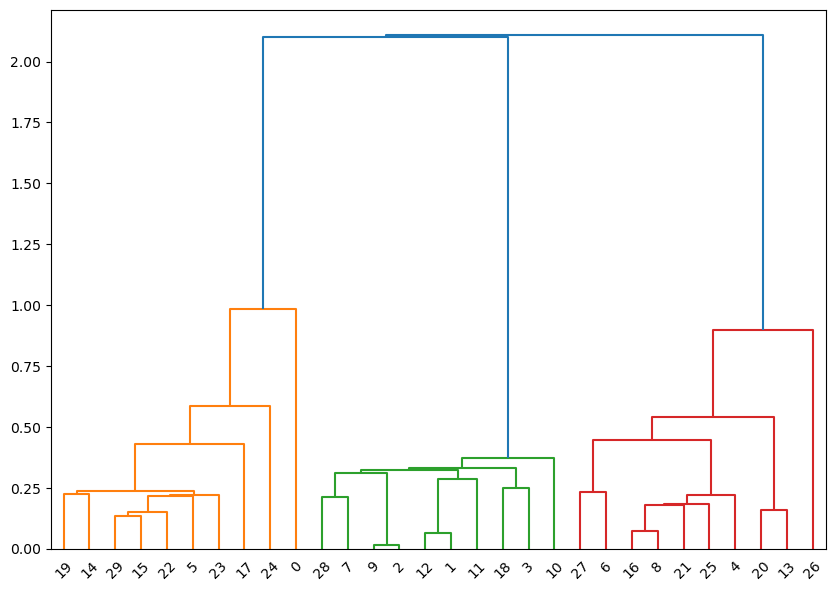

In [63]:
# Генерация синтетических данных
X, _ = make_blobs(n_samples=30, centers=3, cluster_std=0.4, random_state=0)

# Построение матрицы объединения
linked = linkage(X, 'single')

# Визуализация дендрограммы
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

На дендрограмме выше можем наблюдать как начальные кластеры(30 штук) постепенно соединяются в кластеры побольше до тех пор пока не будет образовано 3 кластера. 

## 4.1 DBSCAN (Density-based spatial clustering of applications with noise) 

***DBSCAN (Density-Based Spatial Clustering of Applications with Noise)*** - метод кластеризации, который может обнаруживать  кластеры произвольной формы. Он может обрабатывать шум и не требует заранее заданного числа кластеров.

Все объекты(точки) можно разделить на три типа:

* корневые - точки в окрестности которых есть как минимум некоторое число $N$ точек.  
* граничные - точки в окрестности корневой 
* шумовые - не корневые и не граничные точки

1. Корневые точки, имеющие общую окрестность, соединяются ребрами.
2. Таким образом получается граф, в котором выделяются компоненты связности. 
3. Граничная точка относится к кластеру, в котором содержится наиболее близкая корневая точка для данной граничной точки. 
4. Шумовые точки отбрасываются. 

## 4.2 DBSCAN  в scikit-learn

[ 0  1  0  2  2  2  1  0  2  2  1  1  1  0  1  2  0  0  2  1  2  0  1  0
  2  2  0  2  1  1  2  0  0  1  1  2  1 -1  0  1  2  1  0  1  1  2  1 -1
  2  1  2  1  2  2  1  0  0  2  2  0  1  1  0  2  1  2  0  1  0  1  2  2
  2  2  1  0  1  2  0  0  2  0  1  0  0  0  1  2  0  0  2  1  2  0  1  1
  0  1  2  0  1  2  0  1  0  0  2  0  1  1  0  2  0  0  2  2  0  0  1  1
  1  2  1  1  1  2  1  1  1  2  2  2  0  2  2  1  2  0  2  2  1  0  1  0
  2  2  0  2  2  1  0  2  0  1  2  2  1  1  0  1  0  0  1  0  2  0  0  0
  0  2  1  0  2  1  1 -1  0  1  0  0  1  2  0  0  0  0  1  2  0  2  0  0
  1  1  2  0  1  2  0  2  1  2  0  2  1  2  0  2  0  1  0  0  2  1  1  1
  1  0 -1  1  0 -1  1  1  0  2  2  0 -1  2  0  1  1  0  1  2 -1 -1  0  0
  1  2  2 -1  2  1  2  2  0  1  1  0  1  1  2  0  1  2  0  0  2  0  2  2
 -1  2  0  1  1  1  1  0  0  0  0  0  2  2  1  0  0  1  1 -1  2  1  2  2
  1  1  2  2  2 -1  0  0  2  1  0  0]


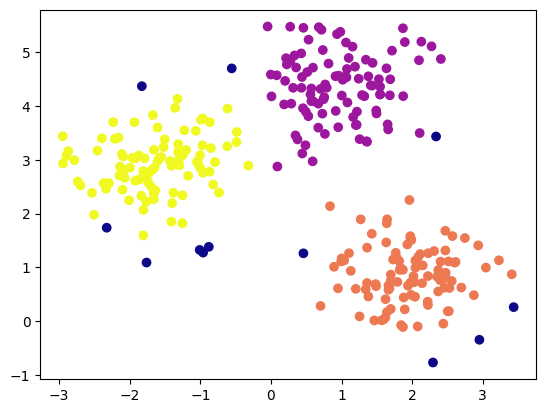

In [6]:
# Генерация синтетических данных
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=0)

# Применение DBSCAN
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print(clusters)

# Визуализация результатов
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='plasma')
plt.show()

Можно наблюдать, что наш алгоритм выделил три кластера и шумовые точки(выделенные синим).

Некоторые из гиперпараметров:

1. **eps**: радиус окрестности вокруг каждой точки.
2. **min_samples**: минимальное количество точек, которые должны находиться в радиусе eps, чтобы точка считалась корневой.

## 5. Оценка качества кластеризации 

Существует несколько оценок качества кластеризации:

1. ***Среднее внутрикластерное растояние*** - сумма расстояний между точками из одного и того же кластера делится на количество пар точек, принадлежащих к одному кластеру.

2. ***Среднее межкластерное расстояние*** - среднее расстояние между кластерами. 

Очевидно, что чем ниже значение 1, тем лучше. Чем выше значение 2 тем также лучше. 

3. ***Оценка силуэта*** является метрикой, используемой для оценки качества кластеризации. Эта метрика предоставляет меру того, насколько каждый объект хорошо согласуется с своим собственным кластером по сравнению с другими кластерами. Silhouette score вычисляется для каждого объекта, и затем вычисляется среднее значение по всем объектам, чтобы получить общую оценку качества кластеризации.

Значение silhouette score находится в диапазоне от -1 до 1. Высокое значение silhouette score указывает на то, что объекты хорошо согласованы с их собственными кластерами и плохо согласованы с соседними кластерами. Значение близкое к 1 указывает на четкое разделение кластеров, в то время как значение близкое к -1 указывает на перекрытие кластеризации.

Формула для вычисления silhouette score для каждого объекта i выглядит следующим образом:

$s(i) = \frac{b(i) - a(i)}{\max{\{a(i), b(i)\}}}$

* $a(i)$ - среднее расстояние от объекта i до всех остальных точек в том же кластере
* $b(i)$ - минимальное среднее расстояние от объекта i до всех точек в любом другом кластере

In [11]:
# Генерируем синтетические данные
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Проводим кластеризацию
kmeans = KMeans(n_clusters=4, random_state=10)
labels = kmeans.fit_predict(X)

# Вычисляем silhouette score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5933677279312303


### Задача 1(2,5 балла)

1. Для заданных данных произведите кластеризацию с помощью Kmeans на 1,2 ... 12 кластеров. 
2. Постройте график зависимости оценки силуэта от числа кластеров. 
3. Найдите набор гиперпараметров n_clusters, tol, init при котором достигается максимум оценки силуэта.

In [10]:
# Генерируем синтетические данные
X, _ = make_blobs(n_samples=1000, centers=6, cluster_std=0.80, random_state=0)

c:\Users\kasya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kasya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c:\Users\kasya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kasya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kasya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kasya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

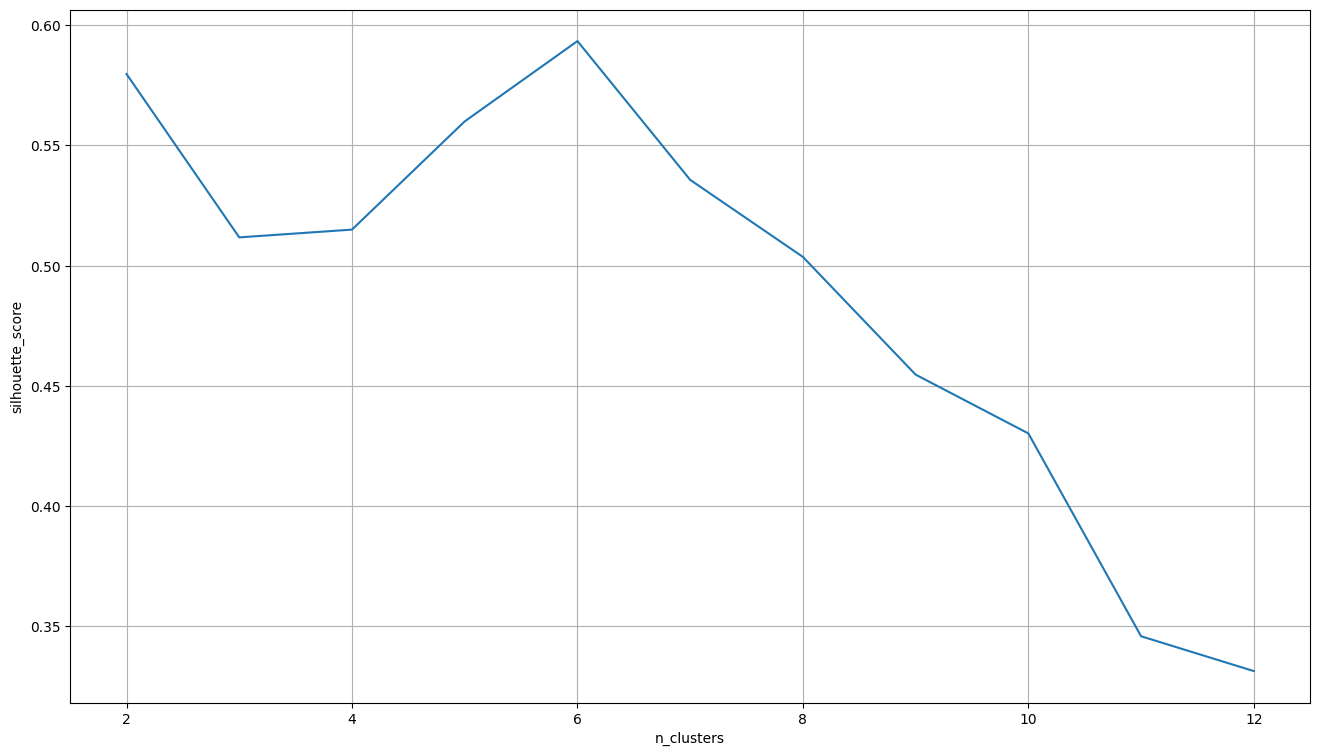

In [38]:
scores = []
x = [i for i in range (2, 13)]
for i in range (2, 13):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    labels = kmeans.fit_predict(X)
    scores.append(silhouette_score(X, labels))

fig, ax = plt.subplots(figsize = (16, 9))
plt.grid()
plt.xlabel('n_clusters')
plt.ylabel('silhouette_score')
plt.plot(x, scores)
plt.show()

In [31]:
X, _ = make_blobs(n_samples=1000, centers=6, cluster_std=0.80, random_state=0)
kmeans = KMeans(n_clusters = 6, random_state = 42, n_init = 20, tol = 0.01)
kmeans.fit(X)
labels = kmeans.fit_predict(X)
print(silhouette_score(X, labels))

0.5933165803913659


### Задача 2(2,5 балла)

1. Для заданных данных произведите кластеризацию с помощью иерархической кластеризация на 1,2 ... 12 кластеров. 
2. Постройте график зависимости оценки силуэта от числа кластеров. 

In [32]:
# Генерируем синтетические данные
X, _ = make_blobs(n_samples=1000, centers=6, cluster_std=0.80, random_state=0)

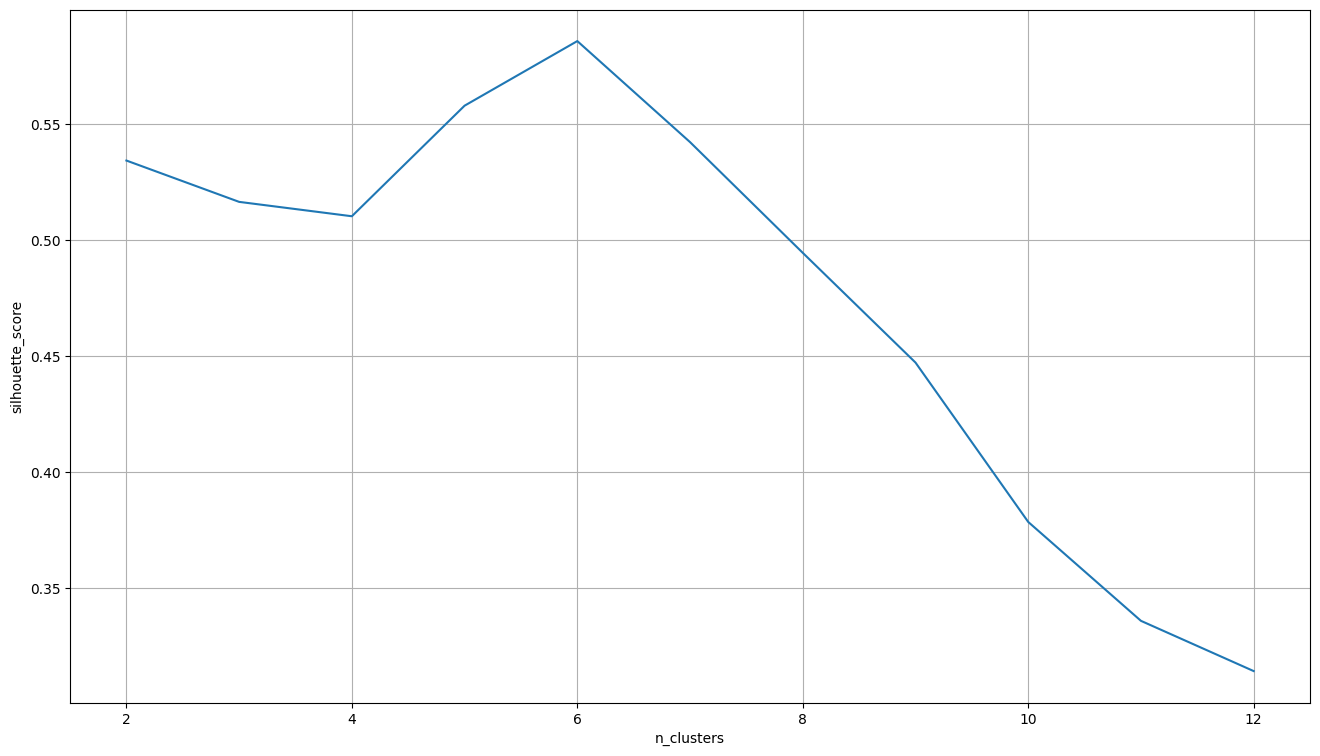

In [39]:
scores = []
x = [i for i in range (2, 13)]
for i in range(2, 13):
    agg_clustering = AgglomerativeClustering(n_clusters=i)
    assignment = agg_clustering.fit_predict(X)
    scores.append(silhouette_score(X, assignment))

fig, ax = plt.subplots(figsize = (16, 9))
plt.grid()
plt.xlabel('n_clusters')
plt.ylabel('silhouette_score')
plt.plot(x, scores)
plt.show()


### Задача 3(2,5 балла)

1. Для заданных данных произведите кластеризацию с помощью DBSCAN. 
2. Найдите набор гиперпараметров eps, min_samples при котором достигается максимум оценки силуэта. 

In [42]:
# Генерируем синтетические данные
X, _ = make_blobs(n_samples=1000, centers=6, cluster_std=0.80, random_state=0)

In [60]:
dbscan = DBSCAN(eps = 0.53, min_samples = 4)
clusters = dbscan.fit_predict(X)
print(silhouette_score(X, clusters))

0.5375158947827494


### Задача 4(2,5 балла)

Что лучше работает на данном датасете? Алгоритм Kmeans или DBSCAN?

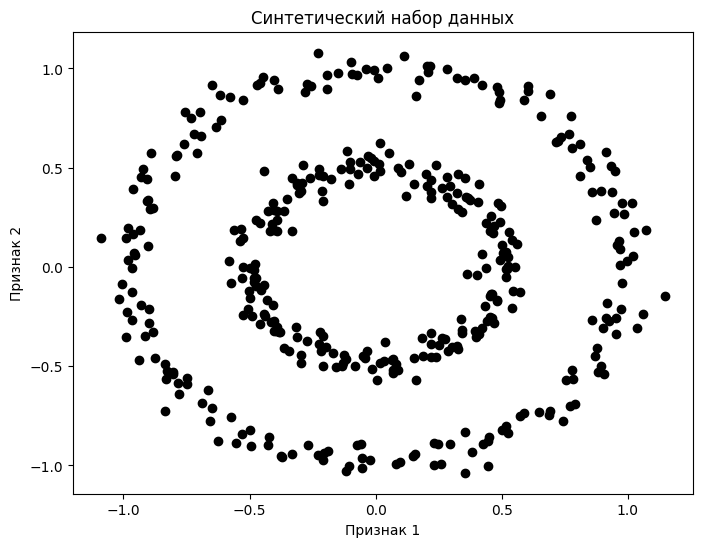

[[ 4.53082571e-01  1.78336703e-01]
 [-4.06890683e-01  3.19827349e-01]
 [ 4.89471325e-01  8.82643157e-01]
 [ 5.58716748e-01  1.17546676e-01]
 [-9.81276486e-01  1.93832377e-01]
 [-7.96657590e-01  4.60056594e-01]
 [-3.43088137e-01 -4.23991352e-01]
 [-9.89073120e-01  1.47706064e-01]
 [-2.59299337e-01  4.46013433e-01]
 [-6.90320776e-01 -6.87383199e-01]
 [ 9.44325932e-01  2.68760281e-01]
 [ 1.82922048e-01 -3.58200054e-01]
 [-2.26761410e-01  1.07846847e+00]
 [-6.96602648e-01  7.81961764e-01]
 [-5.52796110e-01 -8.85091472e-01]
 [ 2.83644506e-01  9.98577993e-01]
 [-4.09319028e-01  2.14022295e-01]
 [ 3.43481940e-01 -3.35313347e-01]
 [ 2.81132369e-01  4.51337051e-01]
 [ 5.42180394e-01 -2.06301508e-01]
 [-7.21722651e-01  6.68720952e-01]
 [ 9.49628313e-01  4.80560500e-01]
 [ 5.17602127e-01 -4.90477116e-02]
 [-2.95104312e-01  3.81529393e-01]
 [ 1.02231447e+00  5.68121159e-02]
 [ 5.21128689e-01 -9.63468784e-03]
 [-9.38275794e-01 -4.69183503e-01]
 [ 3.26301510e-01  2.90184276e-01]
 [-1.78547297e-01  4

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Генерируем синтетические данные с двумя полумесяцами
X, _ = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)

# Визуализируем данные
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='black', marker='o', edgecolors='k')
plt.title('Синтетический набор данных')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()
print(X)

c:\Users\kasya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kasya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.3809675949182367


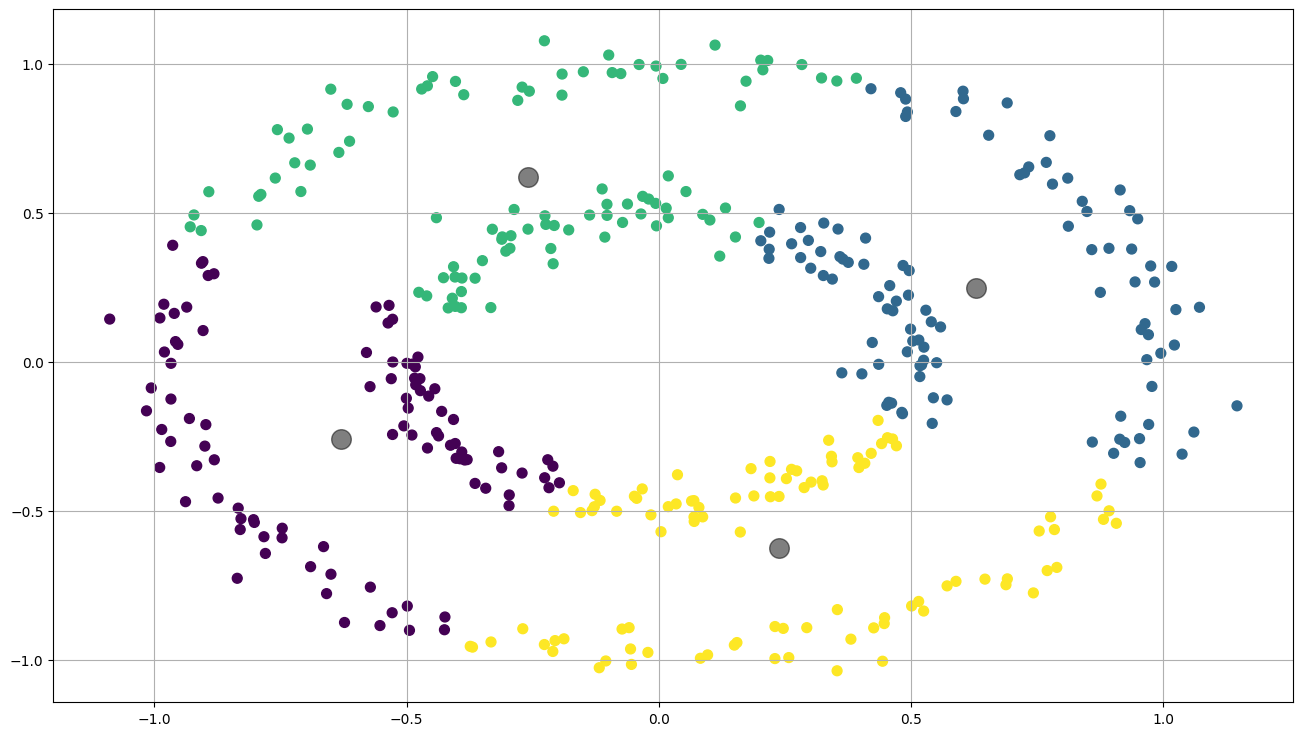

In [86]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)
print(silhouette_score(X, y_kmeans))

fig, ax = plt.subplots(figsize = (16, 9))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.grid()
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

[0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1
 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1
 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1
 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0
 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0
 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1
 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1]
0.11075179974170359


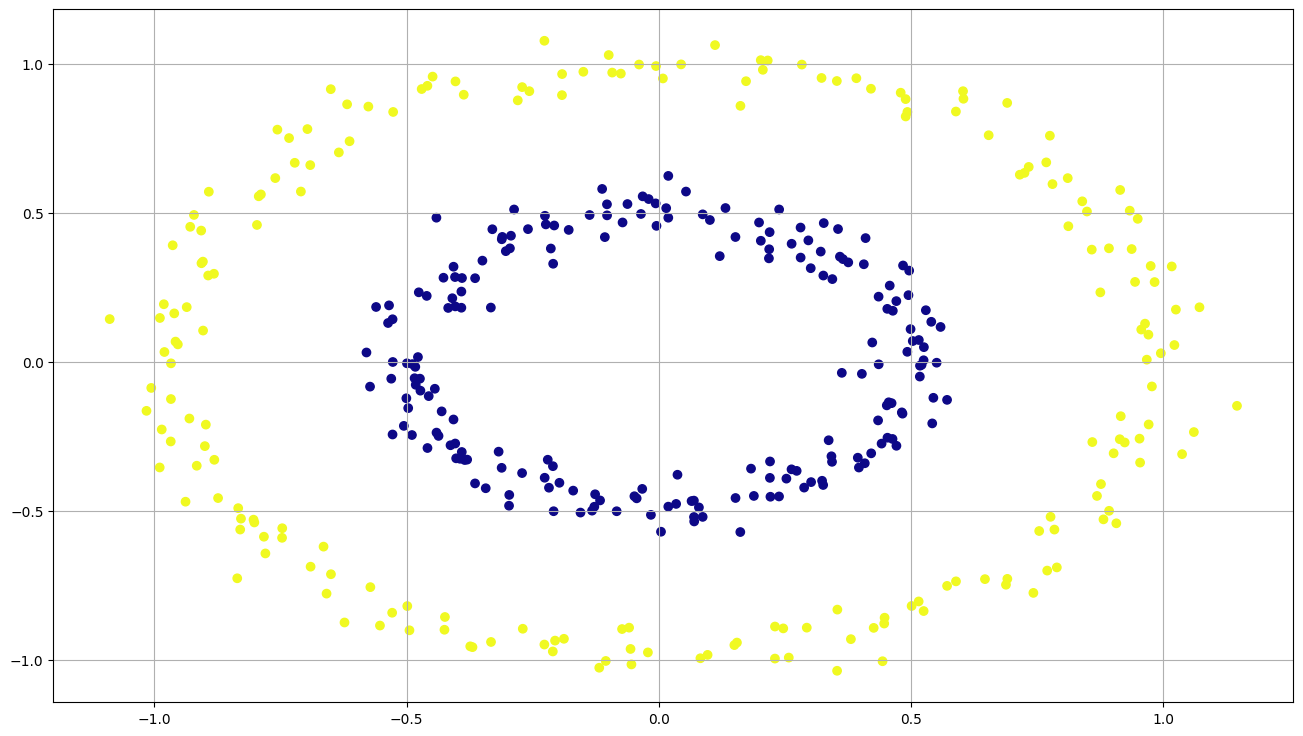

In [87]:
dbscan = DBSCAN(eps = 0.2)
clusters = dbscan.fit_predict(X)
print(clusters)
print(silhouette_score(X, clusters))

fig, ax = plt.subplots(figsize = (16, 9))
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='plasma')
plt.show()